# Project 3: Classification
---
##### Name: Hewei Shen
##### Email: shenh23@wfu.edu
##### Submission Date: 11/21/2023

In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel


/var/folders/lx/fr986f350ps4brcwrmql5cf00000gn/T/ipykernel_1249/2227113895.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# function to calculate perofrmance from sklearn logistic regression models
def performance_rpt(model, X_test, y_test):
    # Calculate performance metrics using the provided model
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    y_true = y_test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    aucroc = roc_auc_score(y_test, y_proba)

    # Print the performance metrics
    #print(" -- Model Performance on Test Set --")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"AUC-ROC  : {aucroc:.4f}\n")

    return accuracy, precision, recall, aucroc


In [3]:
# function for model coefficents from sklearn logistic regression
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals = 4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X2.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by = 'abs_coefficient', ascending = False, inplace = True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients


In [4]:
# plot variable importance for sklearn logistic regression
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize = (5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data = df_plt,
              y = df_plt['feature'],
              x = df_plt['abs_coefficient'], color = "lightblue")
  plt.show()
  print("-- rejected --")
  for i in reject_vars:
        print(f" {i}")

In [369]:
# Load the data into a pandas dataframe

data_path = '/Users/helenas/Desktop/Predictive Analytics/Homework/Project3_20231121/organics.csv'
df = pd.read_csv(data_path)

# Preview data
print(df.info())

# Total count of NaN values
print(df.isnull().sum().div(df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None
ID                 0.000000
DemAffl            0.048823
DemAge             0.067858
DemCluster         0.030329
DemClusterGroup    0.0

In [370]:
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [7]:
pd.crosstab(index = df['DemReg'],
            columns = df['DemTVReg'],
            margins = False)

DemTVReg,Border,C Scotland,East,London,Midlands,N East,N Scot,N West,S & S East,S West,Ulster,Wales & West,Yorkshire
DemReg,,,,,,,,,,,,,
Midlands,0,0,1649,0,3123,0,0,0,0,0,266,1703,0
North,0,0,0,0,0,785,0,2096,0,0,0,0,1443
Scottish,203,836,0,0,0,0,329,0,0,0,0,0,0
South East,0,0,0,6189,0,0,0,0,2445,0,0,0,0
South West,0,0,0,0,0,0,0,0,0,691,0,0,0


### Drop unnecessary columns and handle missing value

In [371]:
df = df.drop(['DemCluster'],axis = 1)

In [372]:
df['DemAffl'].fillna(df['DemAffl'].mean(), inplace = True)
df['DemAge'].fillna(df['DemAge'].mean(), inplace = True)
df['PromTime'].fillna(df['PromTime'].mean(), inplace = True)

In [373]:
df['DemClusterGroup'].fillna('U', inplace = True)
df['DemGender'].fillna('U', inplace = True)
df['DemReg'].fillna('Unknown', inplace = True)
df['DemTVReg'].fillna('Unknown', inplace = True)

In [374]:
# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')

In [375]:
df

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,B,F,North,N West,Silver,5000.00,5.0,0,0


---
# Model Building
---

# Logistic model - Try full set

In [13]:
# Split the data into training and testing sets
X = df.drop(['TargetBuy'], axis = 1)
X = df[['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','PromClass','PromSpend','PromTime']]
# Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns = ['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first = True)

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             15556 non-null  float64
 1   DemAge              15556 non-null  float64
 2   PromSpend           15556 non-null  float64
 3   PromTime            15556 non-null  float64
 4   DemClusterGroup_B   15556 non-null  uint8  
 5   DemClusterGroup_C   15556 non-null  uint8  
 6   DemClusterGroup_D   15556 non-null  uint8  
 7   DemClusterGroup_E   15556 non-null  uint8  
 8   DemClusterGroup_F   15556 non-null  uint8  
 9   DemClusterGroup_U   15556 non-null  uint8  
 10  DemGender_M         15556 non-null  uint8  
 11  DemGender_U         15556 non-null  uint8  
 12  DemReg_North        15556 non-null  uint8  
 13  DemReg_Scottish     15556 non-null  uint8  
 14  DemReg_South East   15556 non-null  uint8  
 15  DemReg_South West   15556 non-null  uint8  
 16  D

In [14]:
# Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y = y_train

logit_full = sm.Logit(y, X).fit()

# Print summary
print(logit_full.summary())


Optimization terminated successfully.
         Current function value: 0.437006
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15535
Method:                           MLE   Df Model:                           20
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.2193
Time:                        14:48:44   Log-Likelihood:                -6798.1
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1451      0.165     -0.881      0.378      -0.468       0.178
DemAf

In [15]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   DemAffl             15556 non-null  float64 
 1   DemAge              15556 non-null  float64 
 2   PromSpend           15556 non-null  float64 
 3   PromTime            15556 non-null  float64 
 4   DemClusterGroup_B   15556 non-null  uint8   
 5   DemClusterGroup_C   15556 non-null  uint8   
 6   DemClusterGroup_D   15556 non-null  uint8   
 7   DemClusterGroup_E   15556 non-null  uint8   
 8   DemClusterGroup_F   15556 non-null  uint8   
 9   DemClusterGroup_U   15556 non-null  uint8   
 10  DemGender_M         15556 non-null  uint8   
 11  DemGender_U         15556 non-null  uint8   
 12  DemReg_North        15556 non-null  uint8   
 13  DemReg_Scottish     15556 non-null  uint8   
 14  DemReg_South East   15556 non-null  uint8   
 15  DemReg_South West   15556 non-nul

In [16]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[11060  2353]
 [  643  1500]]
[[4747  964]
 [ 268  688]]


In [17]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8074
Precision (Train): 0.7000
Recall (Train)  : 0.3893

Accuracy (Test) : 0.8152
Precision (Test): 0.7197
Recall (Test)  : 0.4165



# Logistic model - L1, L2, Elastic net

In [18]:
# Split the data into training and testing sets
X = df.drop(['TargetBuy'], axis = 1)
X = df[['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','PromClass','PromSpend','PromTime']]
# Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns = ['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first = True)

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             15556 non-null  float64
 1   DemAge              15556 non-null  float64
 2   PromSpend           15556 non-null  float64
 3   PromTime            15556 non-null  float64
 4   DemClusterGroup_B   15556 non-null  uint8  
 5   DemClusterGroup_C   15556 non-null  uint8  
 6   DemClusterGroup_D   15556 non-null  uint8  
 7   DemClusterGroup_E   15556 non-null  uint8  
 8   DemClusterGroup_F   15556 non-null  uint8  
 9   DemClusterGroup_U   15556 non-null  uint8  
 10  DemGender_M         15556 non-null  uint8  
 11  DemGender_U         15556 non-null  uint8  
 12  DemReg_North        15556 non-null  uint8  
 13  DemReg_Scottish     15556 non-null  uint8  
 14  DemReg_South East   15556 non-null  uint8  
 15  DemReg_South West   15556 non-null  uint8  
 16  D

In [19]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_train3 = X_train.copy()
X_train4 = X_train.copy()

y_train1 = y_train.copy()
y_train2 = y_train.copy()
y_train3 = y_train.copy()
y_train4 = y_train.copy()

X_test1 = X_test.copy()
X_test2 = X_test.copy()
X_test3 = X_test.copy()
X_test4 = X_test.copy()

y_test1 = y_test.copy()
y_test2 = y_test.copy()
y_test3 = y_test.copy()
y_test4 = y_test.copy()

In [20]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X_train1, y_train1)
lr_l1_01.fit(X_train2, y_train2)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

# fit the models to the training data
lr_l2.fit(X_train3, y_train3)
lr_l12.fit(X_train4, y_train4)


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [21]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

               feature  coefficient  abs_coefficient
11         DemGender_U      -1.6559           1.6559
10         DemGender_M      -0.9442           0.9442
0              DemAffl       0.2449           0.2449
1               DemAge      -0.0531           0.0531
18    PromClass_Silver      -0.0407           0.0407
12        DemReg_North      -0.0324           0.0324
4    DemClusterGroup_B      -0.0250           0.0250
5    DemClusterGroup_C       0.0206           0.0206
14   DemReg_South East      -0.0049           0.0049
3             PromTime       0.0026           0.0026
17  PromClass_Platinum       0.0000           0.0000
16      DemReg_Unknown       0.0000           0.0000
15   DemReg_South West       0.0000           0.0000
2            PromSpend      -0.0000           0.0000
13     DemReg_Scottish       0.0000           0.0000
9    DemClusterGroup_U       0.0000           0.0000
8    DemClusterGroup_F       0.0000           0.0000
7    DemClusterGroup_E       0.0000           

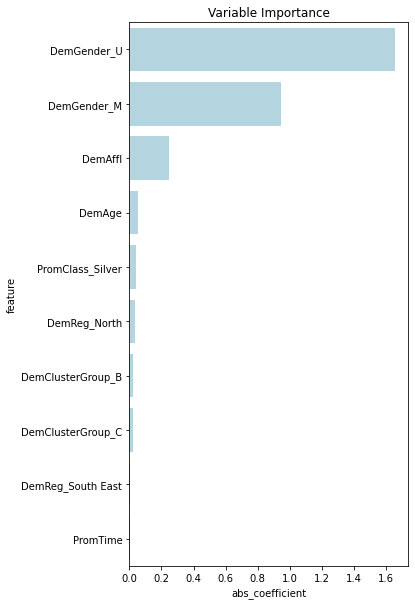

-- rejected --
 PromClass_Platinum
 DemReg_Unknown
 DemReg_South West
 PromSpend
 DemReg_Scottish
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 PromClass_Tin


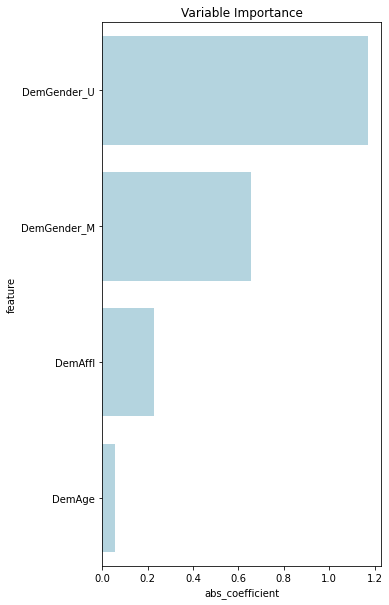

-- rejected --
 PromTime
 DemReg_North
 PromClass_Silver
 PromClass_Platinum
 DemReg_Unknown
 DemReg_South West
 DemReg_South East
 DemReg_Scottish
 PromSpend
 DemClusterGroup_B
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 DemClusterGroup_C
 PromClass_Tin


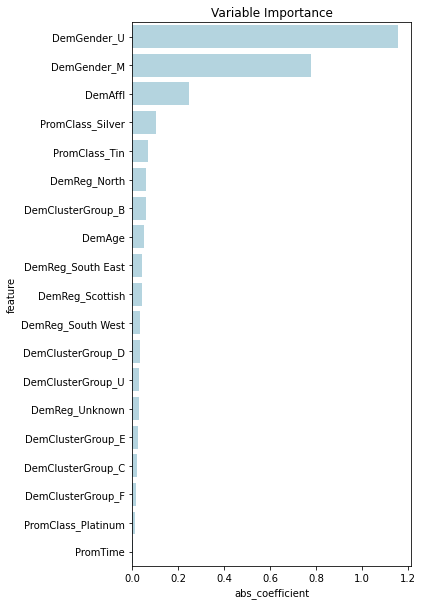

-- rejected --
 PromSpend


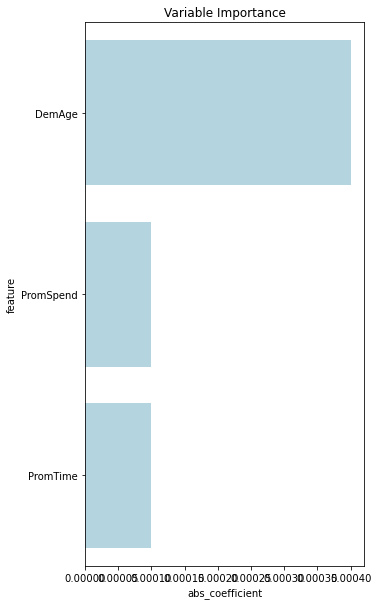

-- rejected --
 DemAffl
 DemReg_North
 PromClass_Silver
 PromClass_Platinum
 DemReg_Unknown
 DemReg_South West
 DemReg_South East
 DemReg_Scottish
 DemGender_M
 DemGender_U
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 DemClusterGroup_C
 DemClusterGroup_B
 PromClass_Tin


In [22]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data = df_plt,
              y = df_plt['feature'],
              x = df_plt['abs_coefficient'], color = "lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

In [23]:
# make predictions on the testing data
y_pred_train1 = lr_l1_1.predict(X_train1)
y_pred_test1 = lr_l1_1.predict(X_test1)
y_proba_train1 = lr_l1_1.predict_proba(X_train1)
y_proba_test1 = lr_l1_1.predict_proba(X_test1)

y_pred_train2 = lr_l1_01.predict(X_train2)
y_pred_test2 = lr_l1_01.predict(X_test2)
y_proba_train2 = lr_l1_01.predict_proba(X_train2)
y_proba_test2 = lr_l1_01.predict_proba(X_test2)

y_pred_train3 = lr_l2.predict(X_train3)
y_pred_test3 = lr_l2.predict(X_test3)
y_proba_train3 = lr_l2.predict_proba(X_train3)
y_proba_test3 = lr_l2.predict_proba(X_test3)

y_pred_train4 = lr_l12.predict(X_train4)
y_pred_test4 = lr_l12.predict(X_test4)
y_proba_train4 = lr_l12.predict_proba(X_train4)
y_proba_test4 = lr_l12.predict_proba(X_test4)

In [24]:
# lr_l1_1: L1 with C = 0.1

# calculate the accuracy, precision, and recall scores
acc_train1 = accuracy_score(y_train1, y_pred_train1)
prec_train1 = precision_score(y_train1, y_pred_train1)
rec_train1 = recall_score(y_train1, y_pred_train1)
auc_train1 = roc_auc_score(y_train1, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train1))
print("Precision: {:.4f}".format(prec_train1))
print("Recall.  : {:.4f}".format(rec_train1))
print("AUC      : {:.4f}".format(auc_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc_test1 = accuracy_score(y_test1, y_pred_test1)
prec_test1 = precision_score(y_test1, y_pred_test1)
rec_test1 = recall_score(y_test1, y_pred_test1)
auc_test1 = roc_auc_score(y_test1, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test1))
print("Precision: {:.4f}".format(prec_test1))
print("Recall.  : {:.4f}".format(rec_test1))
print("AUC      : {:.4f}".format(auc_test1))

 -- train set -- 
Accuracy : 0.8073
Precision: 0.7021
Recall.  : 0.3859
AUC      : 0.8020

 -- test set -- 
Accuracy : 0.8152
Precision: 0.7220
Recall.  : 0.4134
AUC      : 0.8105


In [25]:
# lr_l1_01: L1 with C = 0.01

# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y_train2, y_pred_train2)
prec_train2 = precision_score(y_train2, y_pred_train2)
rec_train2 = recall_score(y_train2, y_pred_train2)
auc_train2 = roc_auc_score(y_train2, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train2))
print("Precision: {:.4f}".format(prec_train2))
print("Recall.  : {:.4f}".format(rec_train2))
print("AUC      : {:.4f}".format(auc_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y_test2, y_pred_test2)
prec_test2 = precision_score(y_test2, y_pred_test2)
rec_test2 = recall_score(y_test2, y_pred_test2)
auc_test2 = roc_auc_score(y_test2, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test2))
print("Precision: {:.4f}".format(prec_test2))
print("Recall.  : {:.4f}".format(rec_test2))
print("AUC      : {:.4f}".format(auc_test2))

 -- train set -- 
Accuracy : 0.8060
Precision: 0.7142
Recall.  : 0.3613
AUC      : 0.7978

 -- test set -- 
Accuracy : 0.8176
Precision: 0.7483
Recall.  : 0.3977
AUC      : 0.8056


In [26]:
# lr_l2: L2 regularization

# calculate the accuracy, precision, and recall scores
acc_train3 = accuracy_score(y_train3, y_pred_train3)
prec_train3 = precision_score(y_train3, y_pred_train3)
rec_train3 = recall_score(y_train3, y_pred_train3)
auc_train3 = roc_auc_score(y_train3, y_proba_train3[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train3))
print("Precision: {:.4f}".format(prec_train3))
print("Recall.  : {:.4f}".format(rec_train3))
print("AUC      : {:.4f}".format(auc_train3))
print("")

# calculate the accuracy, precision, and recall scores
acc_test3 = accuracy_score(y_test3, y_pred_test3)
prec_test3 = precision_score(y_test3, y_pred_test3)
rec_test3 = recall_score(y_test3, y_pred_test3)
auc_test3 = roc_auc_score(y_test3, y_proba_test3[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test3))
print("Precision: {:.4f}".format(prec_test3))
print("Recall.  : {:.4f}".format(rec_test3))
print("AUC      : {:.4f}".format(auc_test3))

 -- train set -- 
Accuracy : 0.8063
Precision: 0.7111
Recall.  : 0.3672
AUC      : 0.7991

 -- test set -- 
Accuracy : 0.8166
Precision: 0.7375
Recall.  : 0.4031
AUC      : 0.8058


In [27]:
# lr_l12: Elastic Net

# calculate the accuracy, precision, and recall scores
acc_train4 = accuracy_score(y_train4, y_pred_train4)
prec_train4 = precision_score(y_train4, y_pred_train4)
rec_train4 = recall_score(y_train4, y_pred_train4)
auc_train4 = roc_auc_score(y_train4, y_proba_train4[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train4))
print("Precision: {:.4f}".format(prec_train4))
print("Recall.  : {:.4f}".format(rec_train4))
print("AUC      : {:.4f}".format(auc_train4))
print("")

# calculate the accuracy, precision, and recall scores
acc_test4 = accuracy_score(y_test4, y_pred_test4)
prec_test4 = precision_score(y_test4, y_pred_test4)
rec_test4 = recall_score(y_test4, y_pred_test4)
auc_test4 = roc_auc_score(y_test4, y_proba_test4[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test4))
print("Precision: {:.4f}".format(prec_test4))
print("Recall.  : {:.4f}".format(rec_test4))
print("AUC      : {:.4f}".format(auc_test4))

 -- train set -- 
Accuracy : 0.7523
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6042

 -- test set -- 
Accuracy : 0.7522
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6086


# Decision tree

In [258]:
X

,DemAffl,DemAge,PromSpend,PromTime,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,DemGender_M,DemGender_U,DemReg_North,DemReg_Scottish,DemReg_South East,DemReg_South West,DemReg_Unknown,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,10.0,76.0,16000.00,4.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4.0,49.0,6000.00,5.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5.0,70.0,0.02,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,10.0,65.0,0.01,7.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,11.0,68.0,0.01,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,13.0,65.0,1500.00,5.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
22219,15.0,73.0,6053.06,12.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
22220,9.0,70.0,6000.00,5.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
22221,11.0,66.0,5000.00,5.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [257]:
# Split the data into training and testing sets
X = df.drop(['TargetBuy'], axis = 1)
X = df[['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','PromClass','PromSpend','PromTime']]
# Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns = ['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first = True)

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             15556 non-null  float64
 1   DemAge              15556 non-null  float64
 2   PromSpend           15556 non-null  float64
 3   PromTime            15556 non-null  float64
 4   DemClusterGroup_B   15556 non-null  uint8  
 5   DemClusterGroup_C   15556 non-null  uint8  
 6   DemClusterGroup_D   15556 non-null  uint8  
 7   DemClusterGroup_E   15556 non-null  uint8  
 8   DemClusterGroup_F   15556 non-null  uint8  
 9   DemClusterGroup_U   15556 non-null  uint8  
 10  DemGender_M         15556 non-null  uint8  
 11  DemGender_U         15556 non-null  uint8  
 12  DemReg_North        15556 non-null  uint8  
 13  DemReg_Scottish     15556 non-null  uint8  
 14  DemReg_South East   15556 non-null  uint8  
 15  DemReg_South West   15556 non-null  uint8  
 16  D

In [29]:
# Create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 80, ccp_alpha = 0)

# Fit the model to the training data
dt.fit(X_train, y_train)

# This code can be used to produce a textual representation of the tree if desired
text_rep = tree.export_text(dt)
print(text_rep)


|--- feature_1 <= 44.50
|   |--- feature_0 <= 9.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |--- feature_1 <= 39.50
|   |   |   |   |   |   |--- feature_1 <= 32.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  32.50
|   |   |   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  39.50
|   |   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |   |--- feature_2 <= 50.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  50.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |--- feature_1 <= 39.50
|   |  

In [32]:
# Make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

# Calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_prob_train[:,1])

# Print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("AUC      : {:.4f}".format(auc_train))
print("")

# Calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_prob_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("AUC      : {:.4f}".format(auc_test))

 -- train set -- 
Accuracy : 0.8177
Precision: 0.6859
Recall.  : 0.4869
AUC      : 0.8369

 -- test set -- 
Accuracy : 0.8158
Precision: 0.6800
Recall.  : 0.4849
AUC      : 0.8170


In [33]:
# Generate confusion matrix for train set
conf_matrix = confusion_matrix(y_pred_train, y_train)
print('Confusion matrix for train set:','\n',conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print('Confusion matrix for test set:','\n',conf_matrix)

Confusion matrix for train set: 
 [[10844  1977]
 [  859  1876]]
Confusion matrix for test set: 
 [[4638  851]
 [ 377  801]]


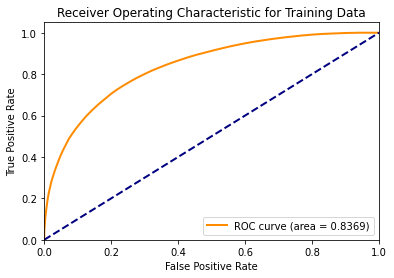

In [34]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

    importance             feature
1     0.477178              DemAge
0     0.326773             DemAffl
11    0.089681         DemGender_U
10    0.075202         DemGender_M
2     0.013459           PromSpend
3     0.008160            PromTime
18    0.003221    PromClass_Silver
6     0.002708   DemClusterGroup_D
14    0.001835   DemReg_South East
4     0.000913   DemClusterGroup_B
12    0.000781        DemReg_North
5     0.000089   DemClusterGroup_C
7     0.000000   DemClusterGroup_E
8     0.000000   DemClusterGroup_F
9     0.000000   DemClusterGroup_U
13    0.000000     DemReg_Scottish
15    0.000000   DemReg_South West
16    0.000000      DemReg_Unknown
17    0.000000  PromClass_Platinum
19    0.000000       PromClass_Tin


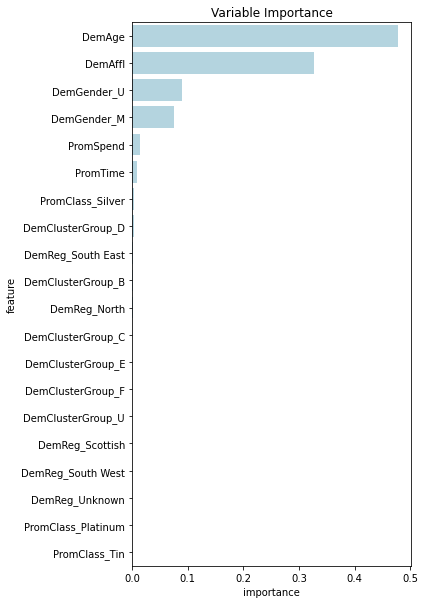

In [363]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

---
# Exploratory Analysis
---

In [290]:
df

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt,CustomerFlag
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0,Stable
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0,Stable
2,868,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1,Minimum
3,1120,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1,Minimum
4,2313,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0,Minimum
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0,0,Stable
22219,52834376,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0,Stable
22220,52837057,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0,Stable
22221,52838096,11.0,66.0,B,F,North,N West,Silver,5000.00,5.0,0,0,Stable


In [283]:
df['CustomerFlag'] = 'Stable'
df['CustomerFlag'][df["PromSpend"]<1] = 'Minimum'
df['CustomerFlag'].value_counts()

Stable     15530
Minimum     6693
Name: CustomerFlag, dtype: int64

In [285]:
df.to_excel('/Users/helenas/Downloads/all_customer.xlsx')

In [36]:
lp = df[df["PromSpend"]>=1]
lp

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
5,2771,9.0,72.0,D,U,North,N West,Platinum,20759.81,3.0,0,0
8,4529,10.0,62.0,F,M,Midlands,East,Silver,2038.76,3.0,0,0
9,5886,14.0,43.0,F,F,Unknown,Unknown,Gold,6000.00,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [280]:
lp.to_excel('/Users/helenas/Downloads/stable_customer.xlsx')

In [37]:
lp["PromSpend"].describe()

count     15530.000000
mean       6325.737488
std        8349.489752
min           1.540000
25%        1500.000000
50%        4884.250000
75%        6822.660000
max      296313.850000
Name: PromSpend, dtype: float64

In [38]:
sp = df[df["PromSpend"]<1]
sp

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
2,868,5.000000,70.000000,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.000000,65.000000,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.000000,68.000000,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
6,3131,11.000000,74.000000,A,F,Midlands,East,Tin,0.01,8.0,0,0
7,3328,13.000000,62.000000,D,M,North,N East,Tin,0.01,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22210,52815720,9.000000,62.000000,B,M,South East,London,Tin,0.01,8.0,0,0
22211,52816106,8.000000,30.000000,C,U,North,N West,Tin,0.01,5.0,0,0
22214,52826926,8.711893,42.000000,B,M,South East,London,Tin,0.01,5.0,1,1
22215,52829143,7.000000,53.797152,B,M,South East,London,Tin,0.01,8.0,1,1


In [281]:
sp.to_excel('/Users/helenas/Downloads/minimum_spender.xlsx')

In [39]:
sp["PromSpend"].describe()

count    6693.000000
mean        0.010353
std         0.002655
min         0.010000
25%         0.010000
50%         0.010000
75%         0.010000
max         0.110000
Name: PromSpend, dtype: float64

In [288]:
df[df["TargetBuy"]==1].mean()

ID           2.629609e+07
DemAffl      1.074930e+01
DemAge       4.732059e+01
PromSpend    3.367835e+03
PromTime     6.134810e+00
TargetAmt    1.189827e+00
dtype: float64

In [338]:
def get_mid50(arr):
    return np.percentile(df[df["TargetBuy"]==1][arr], 25, axis =0), np.percentile(df[df["TargetBuy"]==1][arr], 50, axis =0), np.percentile(df[df["TargetBuy"]==1][arr], 75, axis =0)

In [339]:
get_mid50('DemAge')

(36.0, 44.0, 56.0)

In [338]:
def get_mid70(arr):
    return np.percentile(df[df["TargetBuy"]==1][arr],15,axis =0),np.percentile(df[df["TargetBuy"]==1][arr],85,axis =0)

In [340]:
cf = df[df['PromSpend']>1]
ef = cf[cf["TargetBuy"]==1]
np.percentile(ef['DemAge'], 50, axis =0)

51.0

In [324]:
ef[ef["TargetBuy"]==1].mean()

ID           2.647908e+07
DemAffl      1.067999e+01
DemAge       5.019787e+01
PromSpend    5.427374e+03
PromTime     6.120385e+00
TargetAmt    1.173009e+00
dtype: float64

In [302]:
get_mid70('DemAffl')

(7.0, 15.0)

In [309]:
get_mid70('PromSpend')

(0.01, 6053.35)

In [310]:
get_mid70('PromTime')

(3.0, 9.0)

# By affluence grade

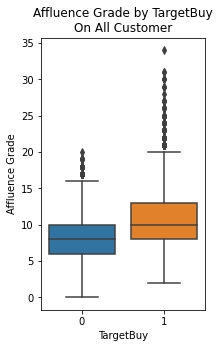

In [341]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,
            x="TargetBuy",
            y="DemAffl")
plt.title("Affluence Grade by TargetBuy"+'\n'+'On All Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Affluence Grade")
plt.show()

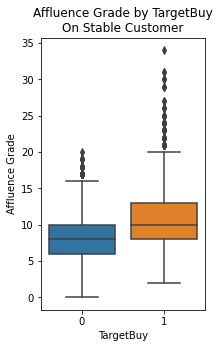

In [342]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=lp,
            x="TargetBuy",
            y="DemAffl")
plt.title("Affluence Grade by TargetBuy"+'\n'+'On Stable Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Affluence Grade")
plt.show()

In [379]:
df[df['TargetBuy']==1]['PromClass'].value_counts()

Silver      2112
Tin         2029
Gold        1236
Platinum     128
Name: PromClass, dtype: int64

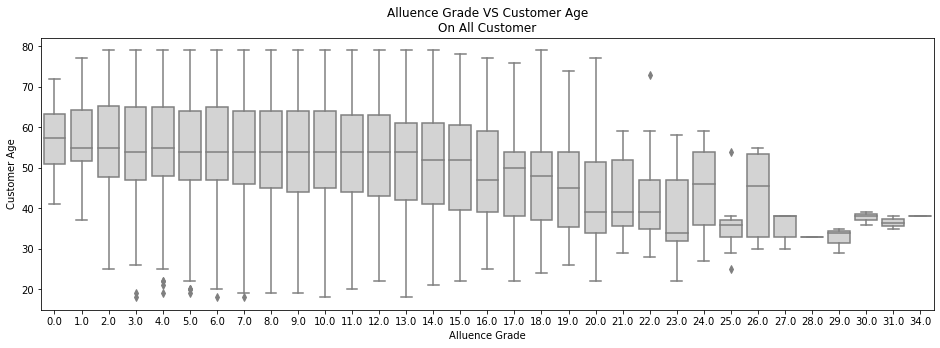

In [377]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 1, 1)
sns.boxplot(data=df[df['DemAffl']!=8.711893272778882],
            x="DemAffl",
            y="DemAge",
           color = '#D3D3D3')
plt.title("Alluence Grade VS Customer Age"+'\n'+'On All Customer')
plt.xlabel("Alluence Grade")
plt.ylabel("Customer Age")
plt.show()

# By age

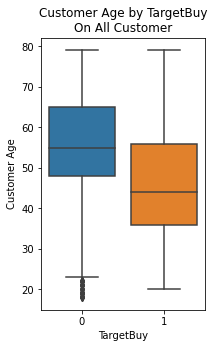

In [345]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,
            x="TargetBuy",
            y="DemAge")
plt.title("Customer Age by TargetBuy"+'\n'+'On All Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Customer Age")
plt.show()

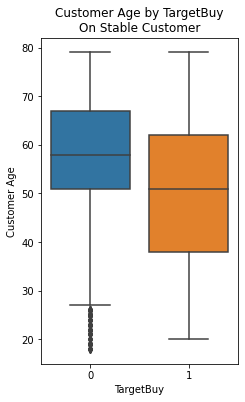

In [128]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=lp,
            x="TargetBuy",
            y="DemAge")
plt.title("Customer Age by TargetBuy"+'\n'+'On Stable Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Customer Age")
plt.show()

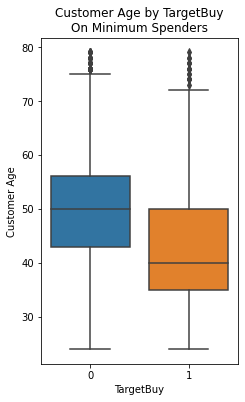

In [213]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=sp,
            x="TargetBuy",
            y="DemAge")
plt.title("Customer Age by TargetBuy"+'\n'+'On Minimum Spenders')
plt.xlabel("TargetBuy")
plt.ylabel("Customer Age")
plt.show()

# By amount spent

In [131]:
gb = df.groupby('TargetBuy')['PromSpend'].agg('mean').reset_index()
gb

,TargetBuy,PromSpend
0,0,4767.247335
1,1,3367.834975


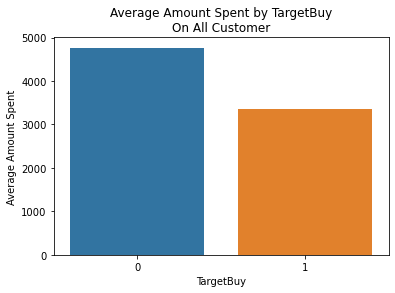

In [132]:
sns.barplot(data = gb, x = 'TargetBuy', y = 'PromSpend')
plt.title("Average Amount Spent by TargetBuy"+'\n'+'On All Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Average Amount Spent")
plt.show()

In [118]:
gb = lp.groupby('TargetBuy')['PromSpend'].agg('mean').reset_index()
gb

,TargetBuy,PromSpend
0,0,6579.064986
1,1,5427.374107


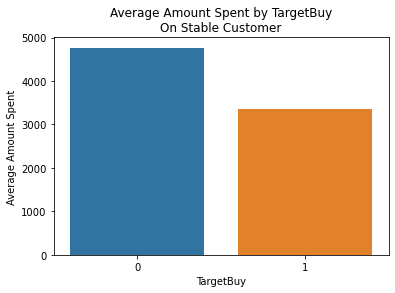

In [133]:
sns.barplot(data = gb, x = 'TargetBuy', y = 'PromSpend')
plt.title("Average Amount Spent by TargetBuy"+'\n'+'On Stable Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Average Amount Spent")
plt.show()

In [49]:
asp = df.sort_values(by = 'PromSpend', ascending = False)
asp

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
3482,7932499,10.000000,67.000000,C,M,South East,London,Platinum,296313.85,8.00000,0,0
2056,4558448,15.000000,76.000000,C,F,North,Yorkshire,Platinum,239542.13,4.00000,1,1
11475,29207630,15.000000,71.000000,A,U,South East,London,Platinum,201000.00,7.00000,0,0
5738,12110442,13.000000,59.000000,C,U,North,N East,Platinum,120000.00,2.00000,0,0
15335,35108564,9.000000,52.000000,C,F,Midlands,East,Platinum,110072.44,4.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5480,11528354,15.000000,53.797152,F,M,Midlands,Midlands,Tin,0.01,6.56467,0,0
5478,11527951,8.711893,39.000000,E,F,Midlands,Midlands,Tin,0.01,5.00000,1,1
2142,4842723,8.711893,72.000000,F,F,Midlands,East,Tin,0.01,8.00000,0,0
16645,37402176,16.000000,44.000000,C,F,South East,London,Tin,0.01,5.00000,1,2


In [50]:
asp_lp = lp.sort_values(by = 'PromSpend', ascending = False).reset_index()
asp_lp

,index,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,3482,7932499,10.0,67.0,C,M,South East,London,Platinum,296313.85,8.0,0,0
1,2056,4558448,15.0,76.0,C,F,North,Yorkshire,Platinum,239542.13,4.0,1,1
2,11475,29207630,15.0,71.0,A,U,South East,London,Platinum,201000.00,7.0,0,0
3,5738,12110442,13.0,59.0,C,U,North,N East,Platinum,120000.00,2.0,0,0
4,15335,35108564,9.0,52.0,C,F,Midlands,East,Platinum,110072.44,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15525,19835,46301790,11.0,60.0,B,U,South East,S & S East,Silver,2.95,4.0,0,0
15526,3130,7147570,7.0,49.0,B,U,Unknown,Unknown,Silver,2.66,13.0,0,0
15527,5349,11202173,10.0,49.0,B,F,North,N East,Silver,2.24,8.0,0,0
15528,4025,9260277,6.0,52.0,D,F,Midlands,Midlands,Silver,1.54,15.0,0,0


# By Amount Spent

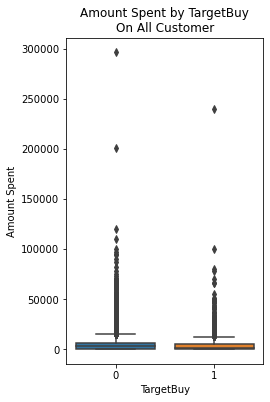

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,
            x="TargetBuy",
            y="PromSpend")
plt.title("Amount Spent by TargetBuy"+'\n'+'On All Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Amount Spent")
plt.show()

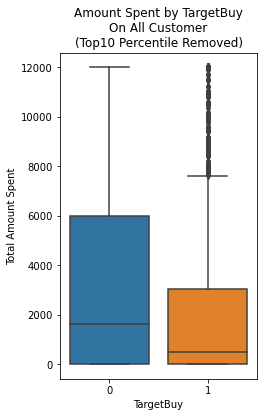

In [221]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=asp[2221:],
            x="TargetBuy",
            y="PromSpend")
plt.title("Amount Spent by TargetBuy"+'\n'+'On All Customer'+'\n'+'(Top10 Percentile Removed)')
plt.xlabel("TargetBuy")
plt.ylabel("Total Amount Spent")
plt.show()

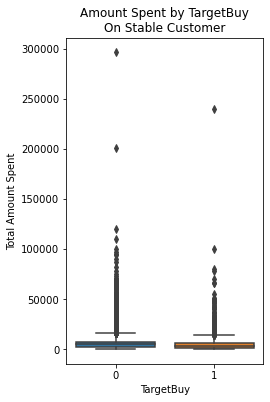

In [222]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=lp,
            x="TargetBuy",
            y="PromSpend")
plt.title("Amount Spent by TargetBuy"+'\n'+'On Stable Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Total Amount Spent")
plt.show()

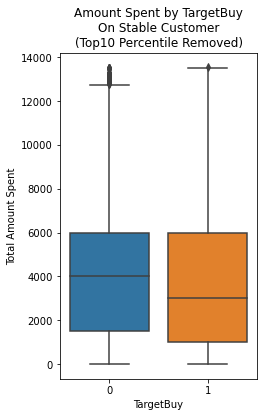

In [223]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=asp_lp[1553:],
            x="TargetBuy",
            y="PromSpend")
plt.title("Amount Spent by TargetBuy"+'\n'+'On Stable Customer'+'\n'+'(Top10 Percentile Removed)')
plt.xlabel("TargetBuy")
plt.ylabel("Total Amount Spent")
plt.show()

In [203]:
sp['PromSpend'].value_counts()

0.01    6487
0.02     198
0.03       5
0.10       2
0.11       1
Name: PromSpend, dtype: int64

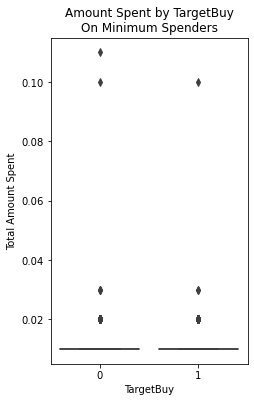

In [224]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=sp,
            x="TargetBuy",
            y="PromSpend")
plt.title("Amount Spent by TargetBuy"+'\n'+'On Minimum Spenders')
plt.xlabel("TargetBuy")
plt.ylabel("Total Amount Spent")
plt.show()

# By neighborhood

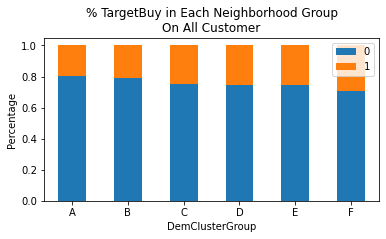

In [174]:
main_category = 'DemClusterGroup'
binary_category = 'TargetBuy'
df_grouped = df[df['DemClusterGroup']!='U'].groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Neighborhood Group"+'\n'+'On All Customer')
plt.xticks(rotation = 0)
plt.show()

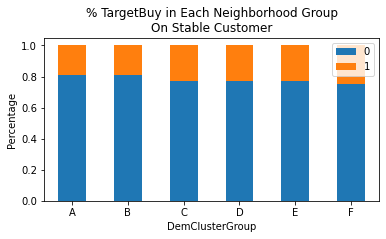

In [175]:
main_category = 'DemClusterGroup'
binary_category = 'TargetBuy'
df_grouped = lp[lp['DemClusterGroup']!='U'].groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Neighborhood Group"+'\n'+'On Stable Customer')
plt.xticks(rotation = 0)
plt.show()

# By gender

In [362]:
df[df['TargetBuy']==1]['DemGender'].value_counts()

F    4205
M     966
U     334
Name: DemGender, dtype: int64

In [361]:
df_grouped

,0,1
DemGender,,
F,0.653881,0.346119
M,0.833878,0.166122


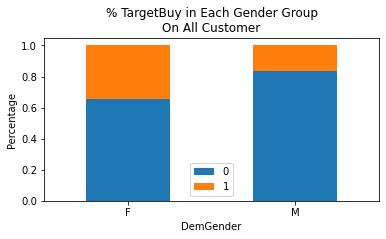

In [360]:
main_category = 'DemGender'
binary_category = 'TargetBuy'
df_grouped = df[df['DemGender']!='U'].groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Gender Group"+'\n'+'On All Customer')
plt.xticks(rotation = 0)
plt.show()

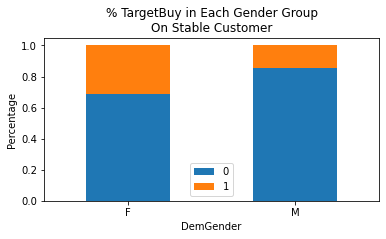

In [173]:
main_category = 'DemGender'
binary_category = 'TargetBuy'
df_grouped = lp[lp['DemGender']!='U'].groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Gender Group"+'\n'+'On Stable Customer')
plt.xticks(rotation = 0)
plt.show()

# By region

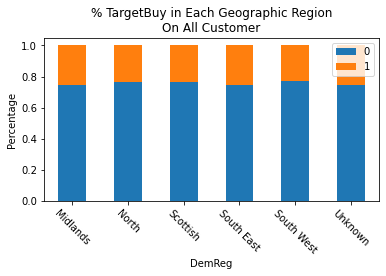

In [179]:
main_category = 'DemReg'
binary_category = 'TargetBuy'
df_grouped = df.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Geographic Region"+'\n'+'On All Customer')
plt.xticks(rotation = -45)
plt.show()

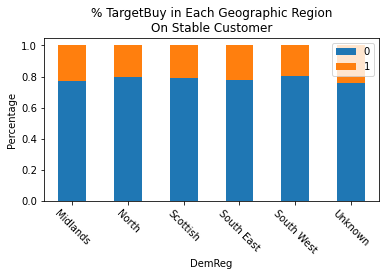

In [180]:
main_category = 'DemReg'
binary_category = 'TargetBuy'
df_grouped = lp.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Geographic Region"+'\n'+'On Stable Customer')
plt.xticks(rotation = -45)
plt.show()

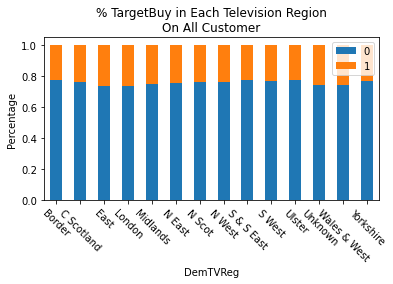

In [181]:
main_category = 'DemTVReg'
binary_category = 'TargetBuy'
df_grouped = df.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Television Region"+'\n'+'On All Customer')
plt.xticks(rotation = -45)
plt.show()

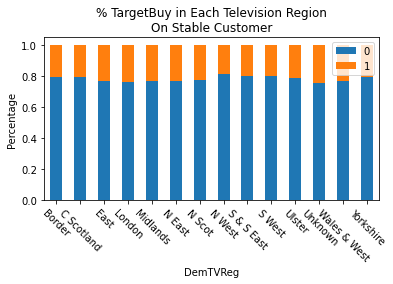

In [184]:
main_category = 'DemTVReg'
binary_category = 'TargetBuy'
df_grouped = lp.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Television Region"+'\n'+'On Stable Customer')
plt.xticks(rotation = -45)
plt.show()

# By time as loyalty card

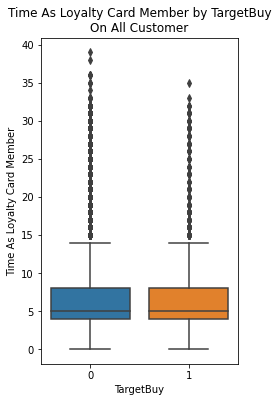

In [112]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,
            x="TargetBuy",
            y="PromTime")
plt.title("Time As Loyalty Card Member by TargetBuy"+'\n'+'On All Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Time As Loyalty Card Member")
plt.show()

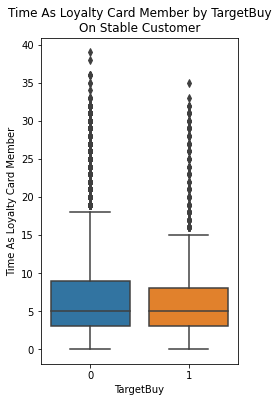

In [153]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=lp,
            x="TargetBuy",
            y="PromTime")
plt.title("Time As Loyalty Card Member by TargetBuy"+'\n'+'On Stable Customer')
plt.xlabel("TargetBuy")
plt.ylabel("Time As Loyalty Card Member")
plt.show()

# By loyalty status

In [355]:
df[df['PromClass']=='Tin'].describe()

,ID,DemAffl,DemAge,PromSpend,PromTime,TargetAmt
count,6.487000e+03,6487.000000,6487.000000,6.487000e+03,6487.000000,6487.000000
mean,2.592632e+07,8.906707,47.698422,1.000000e-02,6.382977,0.380762
std,1.519411e+07,3.443816,10.770675,5.742377e-16,2.376551,0.627453
min,1.120000e+03,0.000000,24.000000,1.000000e-02,0.000000,0.000000
25%,1.124723e+07,7.000000,39.000000,1.000000e-02,5.000000,0.000000
50%,2.872794e+07,8.711893,48.000000,1.000000e-02,5.000000,0.000000
75%,3.748510e+07,11.000000,53.797152,1.000000e-02,8.000000,1.000000
max,5.283389e+07,28.000000,79.000000,1.000000e-02,35.000000,3.000000


In [353]:
df[df['PromClass']=='Silver'].describe()

,ID,DemAffl,DemAge,PromSpend,PromTime,TargetAmt
count,8.572000e+03,8572.000000,8572.000000,8572.000000,8572.000000,8572.000000
mean,2.617568e+07,8.716507,53.662502,1992.261697,6.769056,0.293514
std,1.512322e+07,3.374678,13.018758,1494.990798,4.922240,0.563909
min,8.680000e+02,0.000000,18.000000,0.020000,0.000000,0.000000
25%,1.186875e+07,6.000000,45.000000,600.000000,4.000000,0.000000
50%,2.876501e+07,8.711893,53.797152,1930.000000,6.000000,0.000000
75%,3.775450e+07,10.000000,63.000000,3000.000000,9.000000,0.000000
max,5.283810e+07,34.000000,79.000000,5000.000000,39.000000,3.000000


In [356]:
df[df['PromClass']=='Gold'].describe()

,ID,DemAffl,DemAge,PromSpend,PromTime,TargetAmt
count,6.324000e+03,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,2.592444e+07,8.526441,59.176126,8795.965194,6.420262,0.225648
std,1.493848e+07,3.197174,11.482328,3723.753647,5.645140,0.492390
min,1.400000e+02,0.000000,18.000000,5000.010000,0.000000,0.000000
25%,1.167945e+07,6.000000,52.000000,6000.000000,2.000000,0.000000
50%,2.858973e+07,8.000000,60.000000,6207.855000,5.000000,0.000000
75%,3.699380e+07,10.000000,68.000000,11400.000000,8.000000,0.000000
max,5.285647e+07,29.000000,79.000000,20000.000000,38.000000,3.000000


In [357]:
df[df['PromClass']=='Platinum'].describe()

,ID,DemAffl,DemAge,PromSpend,PromTime,TargetAmt
count,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000
mean,2.681085e+07,8.556539,61.773399,30399.233869,6.969299,0.163095
std,1.466983e+07,3.037027,10.691719,18834.564752,5.903100,0.400619
min,2.771000e+03,2.000000,28.000000,20000.010000,0.000000,0.000000
25%,1.290411e+07,6.000000,53.797152,20697.170000,3.000000,0.000000
50%,2.975567e+07,8.000000,63.000000,24695.300000,4.000000,0.000000
75%,3.750196e+07,10.000000,71.000000,32016.672500,9.000000,0.000000
max,5.282057e+07,21.000000,79.000000,296313.850000,32.000000,3.000000


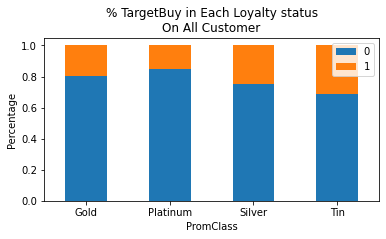

In [191]:
main_category = 'PromClass'
binary_category = 'TargetBuy'
df_grouped = df.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Loyalty status"+'\n'+'On All Customer')
plt.xticks(rotation = 0)
plt.show()

In [212]:
df[df['PromSpend']==0.02]['PromClass'].value_counts()

Silver    198
Name: PromClass, dtype: int64

In [203]:
sp['PromSpend'].value_counts()

0.01    6487
0.02     198
0.03       5
0.10       2
0.11       1
Name: PromSpend, dtype: int64

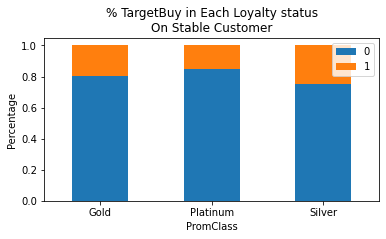

In [189]:
main_category = 'PromClass'
binary_category = 'TargetBuy'
df_grouped = lp.groupby(main_category)[binary_category].value_counts(normalize=True).unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(6,3))
plt.ylabel('Percentage')
plt.title("% TargetBuy in Each Loyalty status"+'\n'+'On Stable Customer')
plt.xticks(rotation = 0)
plt.show()

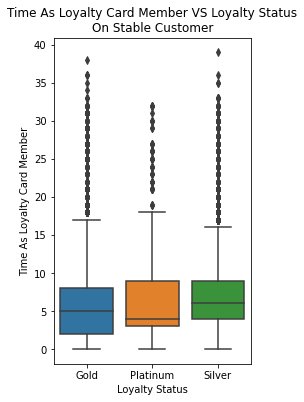

In [156]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=lp,
            x="PromClass",
            y="PromTime")
plt.title("Time As Loyalty Card Member VS Loyalty Status"+'\n'+'On Stable Customer')
plt.xlabel("Loyalty Status")
plt.ylabel("Time As Loyalty Card Member")
plt.show()

# Pridict on the new customer

In [70]:
# Load the data into a pandas dataframe

data_path = '/Users/helenas/Desktop/Predictive Analytics/Homework/Project3_20231121/New_organics.csv'
df_new = pd.read_csv(data_path)

# Preview data
print(df_new.info())

# Total count of NaN values
print(df_new.isnull().sum().div(df.shape[0]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
None
ID                 0.0
DemAffl            0.0
DemAge             0.0
DemCluster         0.0
DemClusterGroup    0.0
DemGender          0.0
DemReg             0.0
DemTVReg           0.0
PromClass          0.0
PromSpend          0.0

In [71]:
df_new = df_new.drop(['DemCluster'],axis = 1)

In [72]:
df_new

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,1,6,46,D,F,South East,London,Tin,0.01,8
1,2,10,39,B,M,Midlands,Ulster,Tin,0.01,5
2,3,7,75,B,M,Midlands,East,Silver,4000.00,7
3,4,7,72,B,F,Midlands,Ulster,Silver,1250.00,23
4,5,7,43,F,M,North,N West,Tin,0.01,5
...,...,...,...,...,...,...,...,...,...,...
145,146,3,59,B,F,Midlands,East,Gold,12000.00,4
146,147,8,69,C,M,South East,London,Gold,14400.00,8
147,158,7,27,F,F,South East,London,Tin,0.01,4
148,149,10,63,B,M,South East,London,Silver,3000.00,7


In [77]:
X = df_new[['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','PromClass','PromSpend','PromTime']]
X['TargetBuy']='0'
# Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns = ['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first = True)
y_pred = dt.predict(X)

ValueError: X has 19 features, but DecisionTreeClassifier is expecting 20 features as input.

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             150 non-null    int64  
 1   DemAge              150 non-null    int64  
 2   PromSpend           150 non-null    float64
 3   PromTime            150 non-null    int64  
 4   TargetBuy           150 non-null    object 
 5   DemClusterGroup_B   150 non-null    uint8  
 6   DemClusterGroup_C   150 non-null    uint8  
 7   DemClusterGroup_D   150 non-null    uint8  
 8   DemClusterGroup_E   150 non-null    uint8  
 9   DemClusterGroup_F   150 non-null    uint8  
 10  DemGender_M         150 non-null    uint8  
 11  DemGender_U         150 non-null    uint8  
 12  DemReg_North        150 non-null    uint8  
 13  DemReg_Scottish     150 non-null    uint8  
 14  DemReg_South East   150 non-null    uint8  
 15  DemReg_South West   150 non-null    uint8  
 16  PromClas

---
# Pridict on the new customer
---

In [70]:
# Load the data into a pandas dataframe

data_path = '/Users/helenas/Desktop/Predictive Analytics/Homework/Project3_20231121/New_organics.csv'
df_new = pd.read_csv(data_path)

# Preview data
print(df_new.info())

# Total count of NaN values
print(df_new.isnull().sum().div(df.shape[0]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
None
ID                 0.0
DemAffl            0.0
DemAge             0.0
DemCluster         0.0
DemClusterGroup    0.0
DemGender          0.0
DemReg             0.0
DemTVReg           0.0
PromClass          0.0
PromSpend          0.0

In [71]:
df_new = df_new.drop(['DemCluster'],axis = 1)

In [72]:
df_new

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,1,6,46,D,F,South East,London,Tin,0.01,8
1,2,10,39,B,M,Midlands,Ulster,Tin,0.01,5
2,3,7,75,B,M,Midlands,East,Silver,4000.00,7
3,4,7,72,B,F,Midlands,Ulster,Silver,1250.00,23
4,5,7,43,F,M,North,N West,Tin,0.01,5
...,...,...,...,...,...,...,...,...,...,...
145,146,3,59,B,F,Midlands,East,Gold,12000.00,4
146,147,8,69,C,M,South East,London,Gold,14400.00,8
147,158,7,27,F,F,South East,London,Tin,0.01,4
148,149,10,63,B,M,South East,London,Silver,3000.00,7


In [259]:
X_new = df_new[['DemAffl','DemAge','DemClusterGroup','DemGender','DemReg','PromClass','PromSpend','PromTime']]
X_new['TargetBuy']='0'
# Create dummy variables for nominal inputs
X_new = pd.get_dummies(X_new, columns = ['DemClusterGroup','DemGender','DemReg','PromClass'], drop_first = True)

In [271]:
X_new['DemClusterGroup_U']= 0
X_new['DemClusterGroup_U'] = X_new['DemClusterGroup_U'].astype('uint8')

In [273]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DemAffl             150 non-null    int64  
 1   DemAge              150 non-null    int64  
 2   PromSpend           150 non-null    float64
 3   PromTime            150 non-null    int64  
 4   TargetBuy           150 non-null    object 
 5   DemClusterGroup_B   150 non-null    uint8  
 6   DemClusterGroup_C   150 non-null    uint8  
 7   DemClusterGroup_D   150 non-null    uint8  
 8   DemClusterGroup_E   150 non-null    uint8  
 9   DemClusterGroup_F   150 non-null    uint8  
 10  DemGender_M         150 non-null    uint8  
 11  DemGender_U         150 non-null    uint8  
 12  DemReg_North        150 non-null    uint8  
 13  DemReg_Scottish     150 non-null    uint8  
 14  DemReg_South East   150 non-null    uint8  
 15  DemReg_South West   150 non-null    uint8  
 16  PromClas

In [278]:
y_new_pred = dt.predict(X_new)
df_new['TargetBuy']= y_new_pred
df_new

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,1,6,46,D,F,South East,London,Tin,0.01,8,0
1,2,10,39,B,M,Midlands,Ulster,Tin,0.01,5,0
2,3,7,75,B,M,Midlands,East,Silver,4000.00,7,0
3,4,7,72,B,F,Midlands,Ulster,Silver,1250.00,23,0
4,5,7,43,F,M,North,N West,Tin,0.01,5,0
...,...,...,...,...,...,...,...,...,...,...,...
145,146,3,59,B,F,Midlands,East,Gold,12000.00,4,0
146,147,8,69,C,M,South East,London,Gold,14400.00,8,0
147,158,7,27,F,F,South East,London,Tin,0.01,4,1
148,149,10,63,B,M,South East,London,Silver,3000.00,7,0


In [381]:
df_new.to_excel('/Users/helenas/Desktop/Predictive Analytics/Homework/Project3_20231121/New_organics_pred.xlsx')